In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4 * x

tensor([True, True, True, True])

In [6]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [8]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [10]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [11]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [12]:
a.grad == d / a

tensor(True)

In [13]:
def control_flow(x):
    if x > 0:
        return x ** 2
    else:
        return x ** 3

x = torch.tensor(2.0, requires_grad=True)
y = control_flow(x)
y.backward()
print(x.grad)  # 输出应为 4.0（导数 2x）

x = torch.tensor(-1.0, requires_grad=True)
y = control_flow(x)
y.backward()
print(x.grad)  # 输出应为 3.0（导数 3x²）

tensor(4.)
tensor(3.)


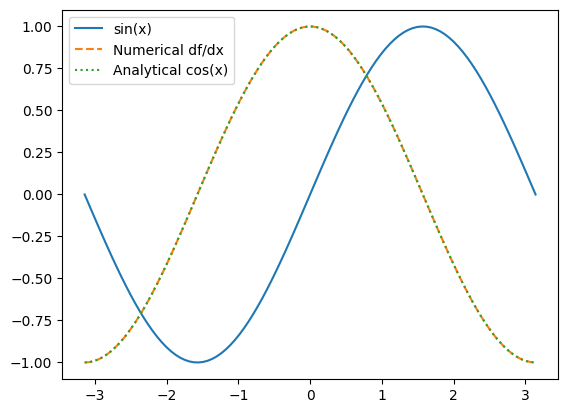

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
h = 0.01
f = np.sin(x)
df_numerical = (np.sin(x + h) - np.sin(x - h)) / (2 * h)
df_analytical = np.cos(x)

plt.plot(x, f, label="sin(x)")
plt.plot(x, df_numerical, "--", label="Numerical df/dx")
plt.plot(x, df_analytical, ":", label="Analytical cos(x)")
plt.legend()
plt.show()